# Exploring Credit Rejection in SCF: A Two-Feature Analysis

In the previous notebook, I explored data from the Survey of Consumer Finances (SCF), paying particular attention to households that have been turned down for credit or feared being denied credit. In this notebook, I'll build a model to segment those households into distinct clusters and examine the differences between those clusters.

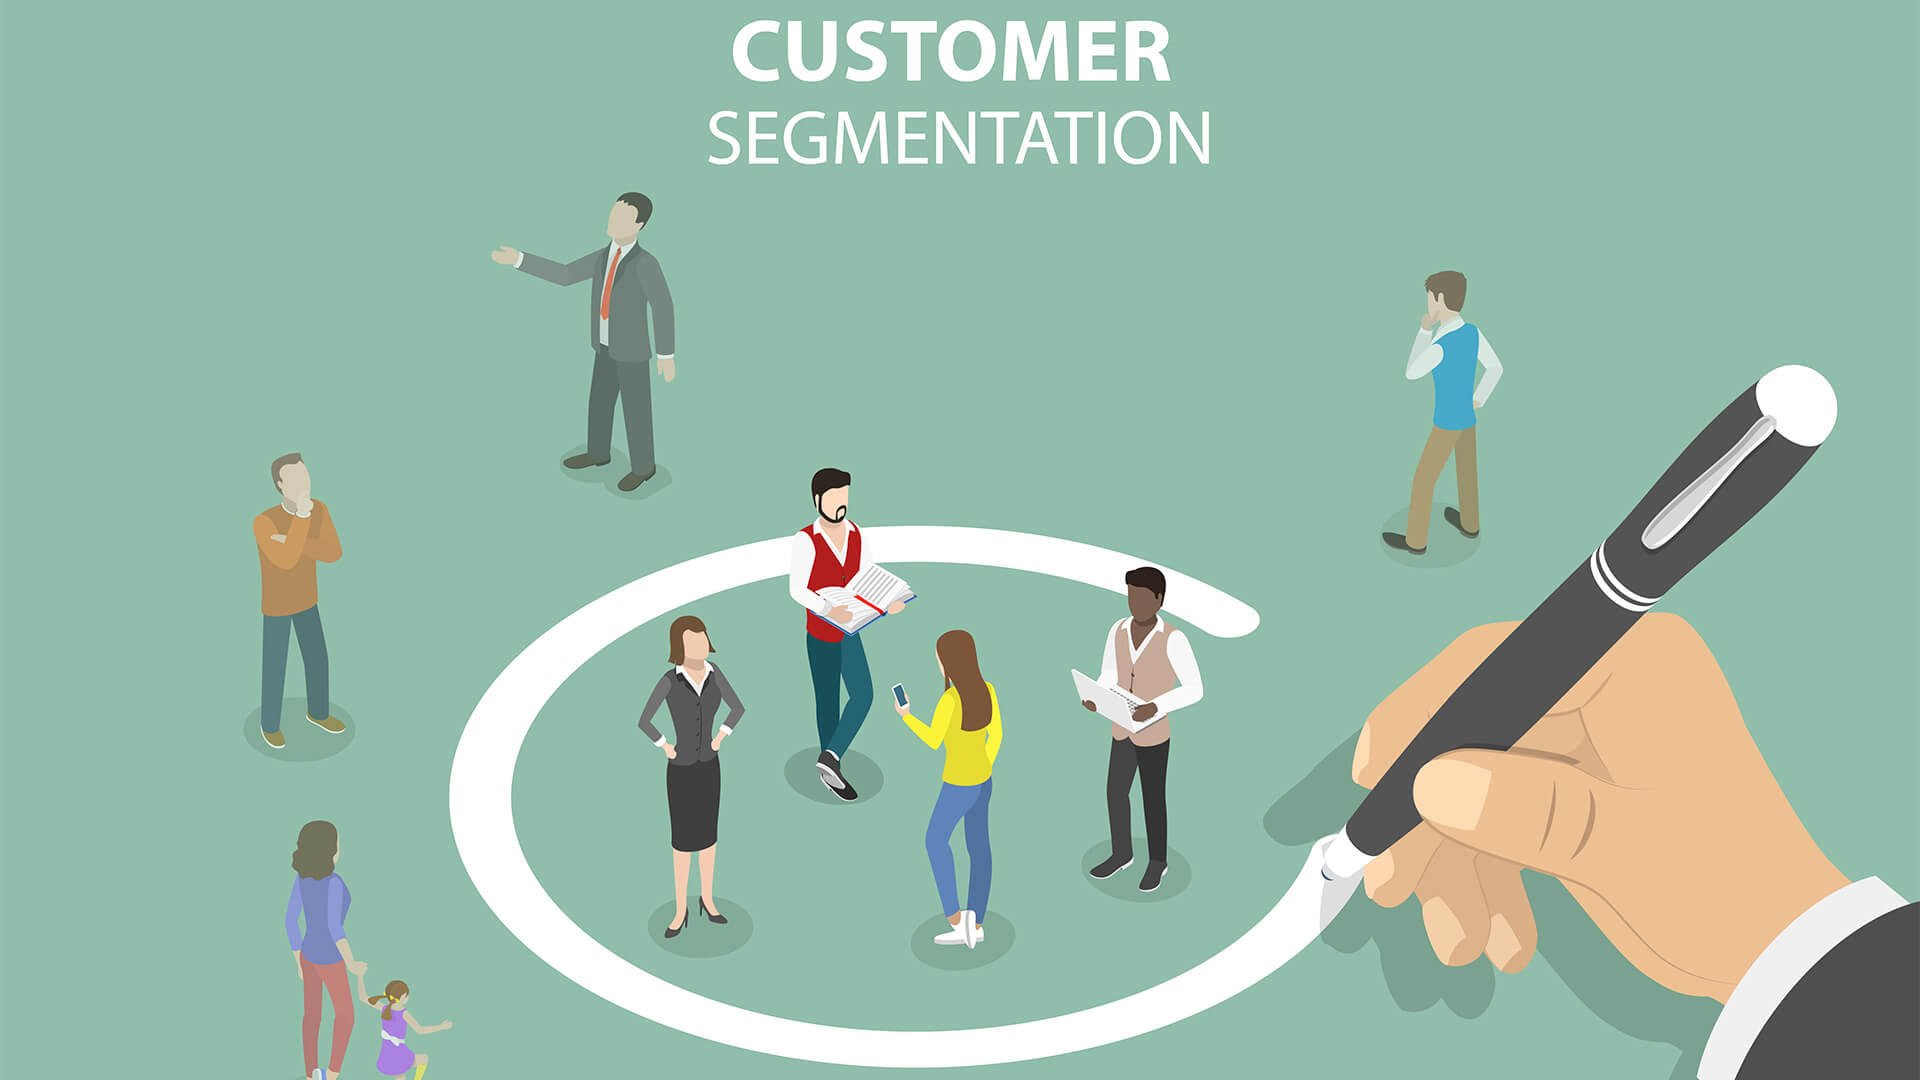


# Import Libraries & Load dataset

In [ ]:
# Import the 'matplotlib.pyplot' module as 'plt' for creating plots and visualizations
import matplotlib.pyplot as plt

# Import the 'pandas' library as 'pd' for data manipulation and analysis
import pandas as pd

# Import the 'seaborn' library as 'sns' for enhancing data visualization
import seaborn as sns

# Import the 'KMeans' class from the 'sklearn.cluster' module for K-means clustering
from sklearn.cluster import KMeans

# Import the 'silhouette_score' function from the 'sklearn.metrics' module for silhouette score calculation
from sklearn.metrics import silhouette_score


In [ ]:
# Define a wrangle function that takes the path of a CSV file as input
def wrangle(filepath):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filepath)

    # Create a mask to filter rows where "TURNFEAR" column is equal to 1 (households turned down or feared denial of credit)
    mask = df["TURNFEAR"] == 1

    # Apply the mask to subset the DataFrame to only include relevant rows
    df = df[mask]

    # Return the subset DataFrame containing households with credit-related concerns
    return df


In [ ]:
# Use the wrangle function to load and process data from the "scfp2019.zip" file
df = wrangle("/content/drive/MyDrive/Colab Notebooks/scfp2019.zip")

# Print the shape of the resulting DataFrame, indicating the number of rows and columns
print(df.shape)

# Display the first five rows of the DataFrame to examine the data
df.head()


(4623, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


#Explore

In the previous notebook , I  analyzed various features within the "TURNFEAR" subset of data.
One of the key aspects I explored was the relationship between real estate and debt.
To revisit and review that specific relationship, let's recreate the graph I previously examined.


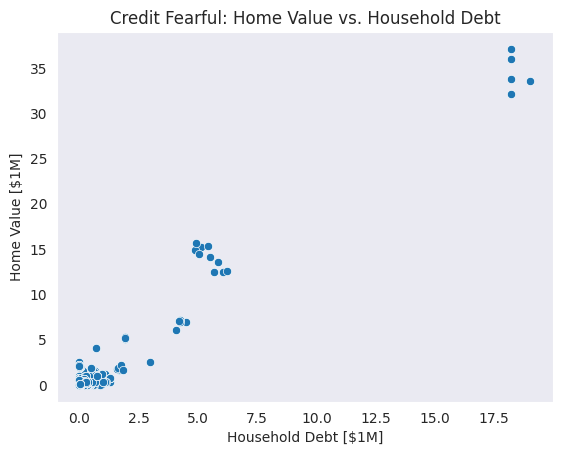

In [ ]:
# Set the seaborn style to "dark" for a black background
sns.set_style("dark")
# Plot "HOUSES" vs "DEBT"
# Create a scatter plot using seaborn with "DEBT" on the x-axis and "HOUSES" on the y-axis
sns.scatterplot(x=df["DEBT"]/1e6, y=df["HOUSES"]/1e6)

# Label the x-axis with "Household Debt [$1M]"
plt.xlabel("Household Debt [$1M]")

# Label the y-axis with "Home Value [$1M]"
plt.ylabel("Home Value [$1M]")

# Set the title of the plot as "Credit Fearful: Home Value vs. Household Debt"
plt.title("Credit Fearful: Home Value vs. Household Debt");


 While the scatter plot offers an initial glimpse into the connection between household debt and home value, it's worth noting that no evident linear pattern emerges. However, what does stand out are discernible clusters or groupings within the data points. These groupings could potentially signify varying financial behaviors among households experiencing credit-related concerns. Delving deeper into this dataset by employing clustering techniques will enable us to classify credit-anxious households into meaningful categories based on these attributes. This classification has the potential to yield more precise financial insights, aiding in more informed decision-making processes.







#Split

In [ ]:
# Create a subset of the DataFrame 'df' containing only the "DEBT" and "HOUSES" columns
X = df[["DEBT", "HOUSES"]]

# Print the shape of the subset DataFrame to check its dimensions
print(X.shape)

# Display the first few rows of the subset DataFrame for a quick look at the data
X.head()


(4623, 2)


,DEBT,HOUSES
5,12200.0,0.0
6,12600.0,0.0
7,15300.0,0.0
8,14100.0,0.0
9,15400.0,0.0


#Build Model

In [ ]:
# Build model
model = KMeans(n_clusters=3, random_state=42,n_init='auto' )
# Fit model to data
model.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [ ]:
# Extract the cluster labels assigned by the clustering model
labels = model.labels_

# Display the first 10 cluster labels as a sample
labels[:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Utilizing the labels I have just extracted, I can now reconstruct the scatter plot from my previous analysis. However, this time, I'll add a distinctive touch by color-coding each data point based on the cluster assignment made by the model.

In [ ]:
centroids = model.cluster_centers_
centroids

array([[   91017.57766674,   116150.29328698],
       [18384100.        , 34484000.        ],
       [ 5065800.        , 11666666.66666667]])

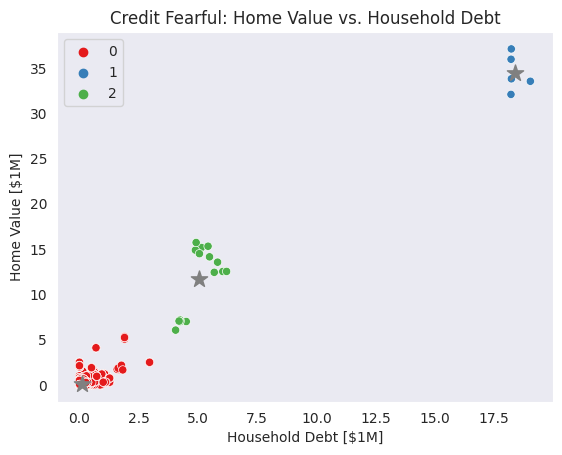

In [ ]:
# Create a scatter plot of "HOUSES" vs "DEBT" with data points color-coded by cluster label
sns.scatterplot(
    x=df["DEBT"]/1e6,
    y=df["HOUSES"]/1e6,
    hue=labels,
     palette='Set1'
)

# Add centroids to the plot
plt.scatter(
    x=centroids[:,0]/1e6,
    y=centroids[:,1]/1e6,
    color="grey",    # Set the color of centroids to grey
    marker="*",      # Use a star marker for centroids
    s=150            # Set the size of centroids
)

# Label the x-axis with "Household Debt [$1M]"
plt.xlabel("Household Debt [$1M]")

# Label the y-axis with "Home Value [$1M]"
plt.ylabel("Home Value [$1M]")

# Set the title of the plot as "Credit Fearful: Home Value vs. Household Debt"
plt.title("Credit Fearful: Home Value vs. Household Debt");


# Evaluate

In [ ]:
# Calculate the inertia (within-cluster sum of squares) for the clustering model with 3 clusters
inertia = model.inertia_

# Print the inertia value as a measure of cluster compactness
print("Inertia (3 clusters):", inertia)


Inertia (3 clusters): 939554010797057.5


The "best" inertia is 0, and the last score is pretty far from that. It's crucial to understand that inertia is a measurement of distance.The unit of measurement for inertia depends on the unit of measurement of our x- and y-axes, which, in our case, are 'DEBT' and 'HOUSES' measured in tens of millions of dollars. Hence, it's not surprising that the inertia value is relatively large.

To facilitate a more intuitive interpretation, I can turn to the silhouette score. Unlike inertia, silhouette score measures the distance between different clusters and provides a value that ranges from -1 (indicating the worst clustering) to 1 (representing the best clustering). This scale makes it easier to assess the quality of our clustering results. I'll use the silhouette score to gain further insights into the effectiveness of our clustering model.

In [ ]:
# Calculate the silhouette score for the clustering results with 3 clusters
ss = silhouette_score(X, labels)

# Print the silhouette score as a measure of cluster quality
print("Silhouette Score (3 clusters):", ss)


Silhouette Score (3 clusters): 0.9768842462944348


The silhouette score of 0.976 is high, approaching the upper limit of 1. This signifies that the clustering model with 3 clusters has produced highly cohesive and well-separated clusters.

Keep in mind that these performance metrics are influenced by the number of clusters I specified for the model. The number of clusters is a hyperparameter that requires pre-configuration before model training. So, what if I decide to alter the number of clusters? Could it potentially result in improved performance? To find out, I'll explore different cluster numbers and assess their impact on our clustering results.

In [ ]:
# Define a range of cluster numbers from 2 to 12
n_clusters = range(2, 13)

# Initialize empty lists to store inertia errors and silhouette scores for each cluster
inertia_errors = []
silhouette_scores = []

# Loop through the specified cluster numbers to train models and calculate metrics
for k in n_clusters:
    # Create and fit a KMeans clustering model with 'k' clusters
    model = KMeans(n_clusters=k, random_state=42,n_init='auto')
    model.fit(X)

    # Calculate and store the inertia (within-cluster sum of squares) for the current cluster configuration
    inertia_errors.append(model.inertia_)

    # Calculate and store the silhouette score for the current cluster configuration
    silhouette_scores.append(silhouette_score(X, model.labels_))

# Print the inertia errors and silhouette scores for different cluster numbers
print("Inertia:", inertia_errors)
print()
print("Silhouette Scores:", silhouette_scores)


Inertia: [3304291266370079.0, 939554010797057.5, 546098841715650.0, 312953826439186.56, 236584994916207.2, 195642621382745.25, 154463658099050.75, 114552885162826.86, 100364359883755.89, 93740178454445.94, 86962257720883.36]

Silhouette Scores: [0.9904780333746295, 0.9768842462944348, 0.9490311483406091, 0.8145735206135484, 0.7334856695754225, 0.7262447499894008, 0.7268778177530217, 0.7290952925953678, 0.6981925739293788, 0.7086561373646999, 0.7028347023664838]


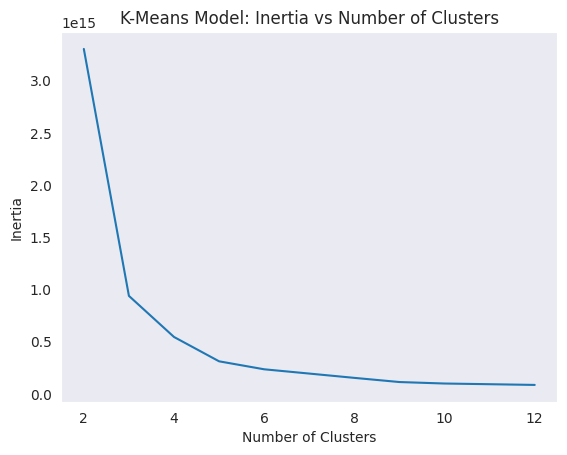

In [ ]:
# Plot `inertia_errors` by `n_clusters` to visualize the elbow method
plt.plot(n_clusters, inertia_errors)

# Label the x-axis as "Number of Clusters"
plt.xlabel("Number of Clusters")

# Label the y-axis as "Inertia"
plt.ylabel("Inertia")

# Set the title of the plot
plt.title("K-Means Model: Inertia vs Number of Clusters");

As I observe the plot, it becomes evident that as the number of clusters increases, the inertia steadily decreases. In fact, I could technically reduce the inertia to 0 by instructing the model to create as many clusters as there are observations in X, which is 4,623. However, that would not serve our analytical purposes effectively.

The key to selecting the optimal number of clusters lies in identifying the 'bend in the elbow' within this plot. Essentially, I'm aiming to pinpoint the point at which the drop in inertia starts to become less pronounced, and the curve begins to flatten. In this particular case, it appears that the ideal number of clusters is around 4 or 5.

Let's see what the silhouette score looks like.

Text(0.5, 1.0, 'K-Means Model: Silhouette Score vs Number of Clusters')

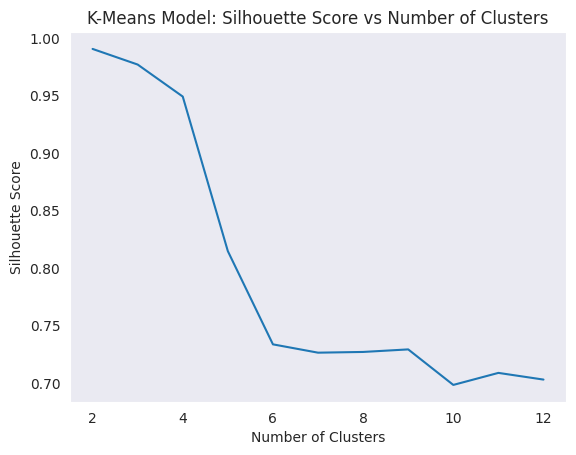

In [ ]:
# Plot `silhouette_scores` by `n_clusters` to visualize the silhouette scores for different cluster numbers
plt.plot(n_clusters, silhouette_scores)

# Label the x-axis as "Number of Clusters"
plt.xlabel("Number of Clusters")

# Label the y-axis as "Silhouette Score"
plt.ylabel("Silhouette Score")

# Set the title of the plot
plt.title("K-Means Model: Silhouette Score vs Number of Clusters")


It's important to note that, unlike the inertia plot, in the case of silhouette scores, higher values are preferable. Consequently, I'm not seeking a 'bend in the elbow' but rather aiming to identify a number of clusters where the silhouette score remains consistently high. Observing the plot, it becomes evident that the silhouette score experiences a significant drop after 4 clusters. Taking into account both the silhouette score's behavior and what we observed in the inertia plot, it appears that the most suitable number of clusters for our data is 4.







let's build a final model.

In [ ]:
# Build model
final_model = KMeans(n_clusters=4,random_state=42,n_init='auto')
# Fit model to data
final_model.fit(X)

KMeans(n_clusters=4, n_init='auto', random_state=42)

#Communicate

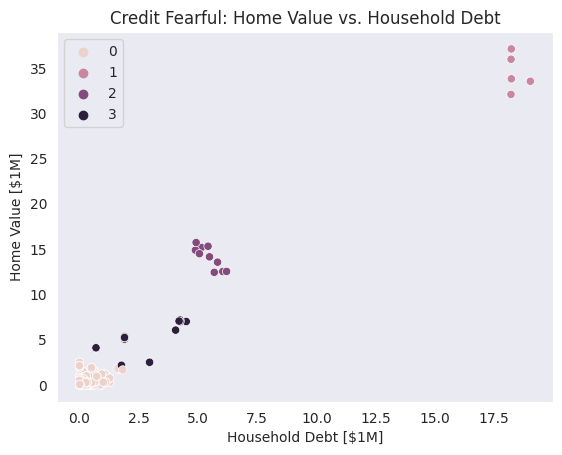

In [ ]:
# Plot "HOUSES" vs "DEBT" with final_model labels
sns.scatterplot(
    x=df["DEBT"]/1e6,
    y= df["HOUSES"]/1e6,
    hue=final_model.labels_,
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

I'm going to make one more visualization, converting the cluster analysis I just did to something a little more actionable: a side-by-side bar chart.

Text(0.5, 1.0, 'Mean Home Value & Household Debt by Cluster')

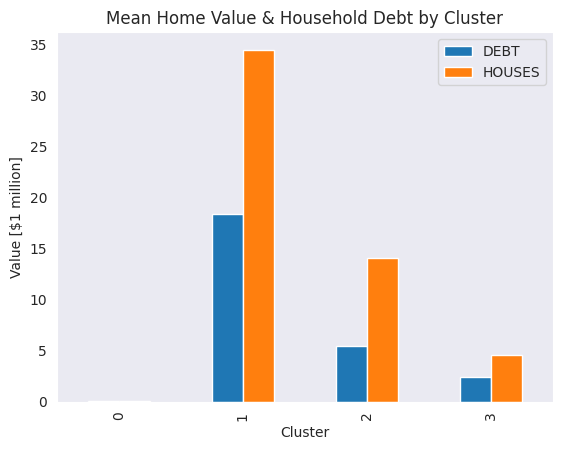

In [ ]:
# Group data by cluster labels and calculate the mean values for each cluster
xgb = X.groupby(final_model.labels_).mean()

# Create a side-by-side bar chart to visualize the mean values
(xgb/1e6).plot(kind="bar")

# Label the x-axis as "Cluster"
plt.xlabel("Cluster")

# Label the y-axis as "Value [$1 million]"
plt.ylabel("Value [$1 million]")

# Set the title of the plot
plt.title("Mean Home Value & Household Debt by Cluster")


In the previous plot, our four distinct clusters are represented along the x-axis, while the dollar values for home value and household debt are displayed on the y-axis.

The initial observation in this chart focuses on the mean home values within each of the four clusters. Cluster 0 primarily comprises households with relatively modest to moderate home values, while clusters 2 and 3 encompass households with notably high home values. Notably, cluster 1 stands out with extraordinarily high home values.

A second crucial aspect to consider is the proportion of debt relative to home value. Clusters 1 and 3 exhibit a proportion of around 0.5, suggesting that these groups possess a moderate level of untapped equity in their homes. Conversely, cluster 0 displays a proportion close to 1, indicating that their primary source of household debt is their mortgage. Cluster 2 is intriguing as it showcases the smallest debt-to-home value proportion, approximately 0.4.

This information carries significance for financial institutions seeking to target customers with tailored products and services. For instance, households within cluster 0 might be inclined to explore mortgage refinancing options to reduce their interest rates. Cluster 2 households, given their substantial home equity, might find a home equity line of credit appealing. Meanwhile, those in cluster 1, characterized by substantial home values, could be candidates for premium, personalized wealth management services.

In essence, this analysis equips financial institutions with valuable insights for crafting product offerings that align with the distinct financial profiles and needs of these clusters, ultimately fostering more effective and targeted customer engagement